Exploratory Data Analysis

What is Exploratory Data Analysis?
In data science projects, exploratory data analysis, or EDA, is an important first step. It involves analyzing and visualizing data in order to identify patterns, understand its key characteristics, and determine the connections between various data points.
EDA helps to spot any unusual data or outliers and is usually done before starting more detailed statistical analysis or building models.

In [3]:
# Getting Information about the Dataset
# We will use the shape parameter to get the shape of the dataset.
# Shape of Dataframe 
import pandas as pd

# Replace 'your_data.csv' with the actual filename
df = pd.read_csv('D:/Data Analytics/Data Analysis with Python/ABC.csv')
print(df.shape)

(458, 9)


In [4]:
# Information about Dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [5]:
# Description of dataset 

df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [6]:
# python code for missing value

df.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [8]:
# Pandas function for Duplicates missing values 

data = df.drop_duplicates(subset ="Name",)
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [10]:
# Python code for value counts in the column 

df.value_counts("Name")

Name
Aaron Brooks          1
Miles Plumlee         1
Mike Muscala          1
Mike Miller           1
Mike Dunleavy         1
                     ..
Gorgui Dieng          1
Gordon Hayward        1
Goran Dragic          1
Glenn Robinson III    1
Zaza Pachulia         1
Name: count, Length: 457, dtype: int64

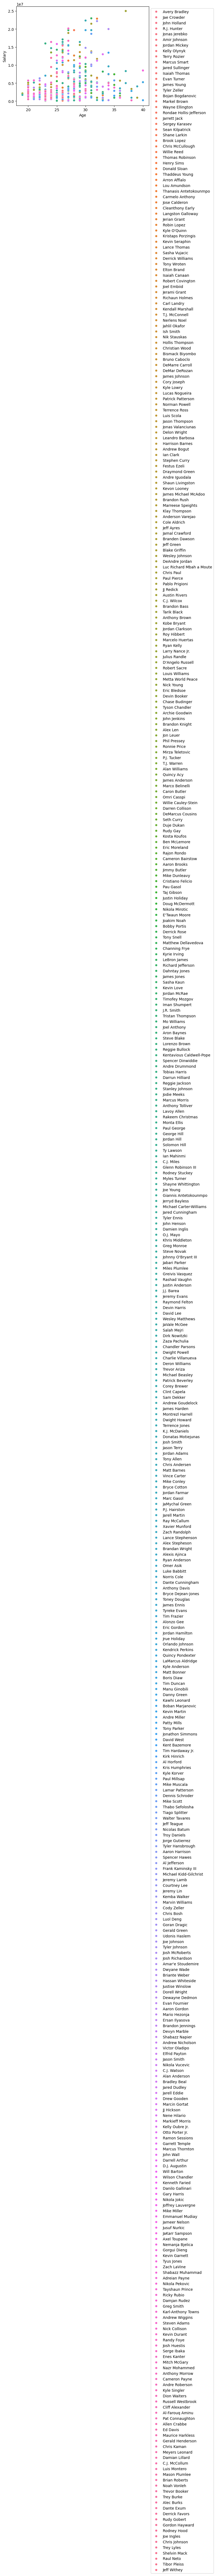

In [11]:
# Relation between variables
# We will see the relationship between the sepal length and sepal width and also between petal length and petal width.
# Comparing Sepal Length and Sepal Width
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x='Age', y='Salary',
                hue='Name', data=df, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()


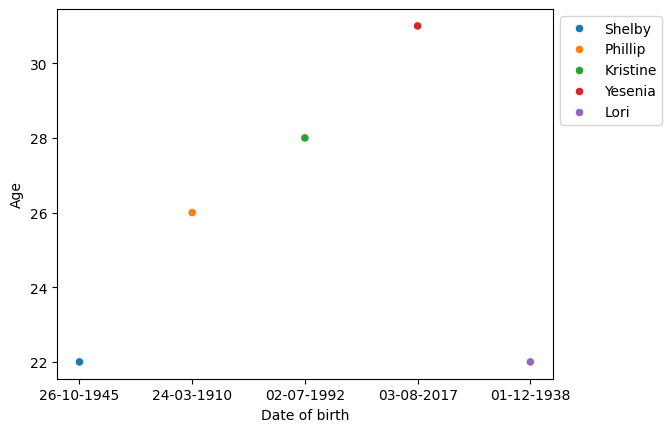

In [15]:
# Comparing Petal Length and Petal Width

import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('D:/Data Analytics/Data Analysis with Python/people_data.csv')
sns.scatterplot(x='Date of birth', y='Age',
                hue='First Name', data=df, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

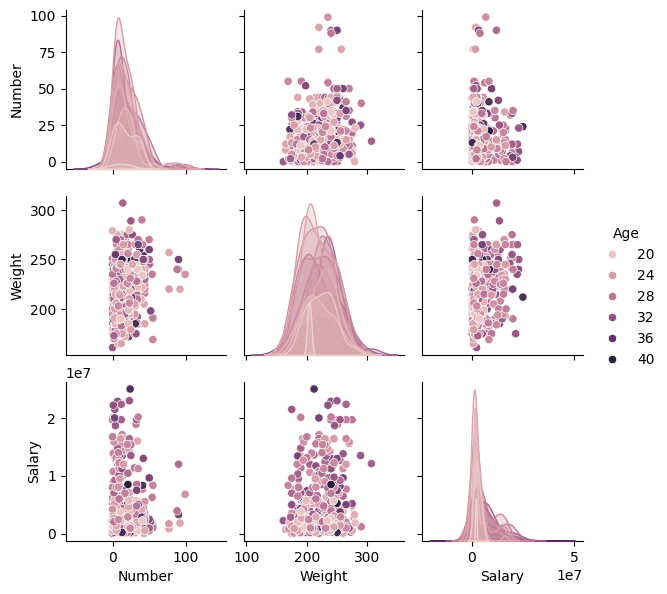

In [22]:
# Python code for pairplot 

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('D:/Data Analytics/Data Analysis with Python/ABC.csv')
sns.pairplot(df.drop(['Name'], axis = 1), 
             hue='Age', height=2)

<Axes: xlabel='Age'>

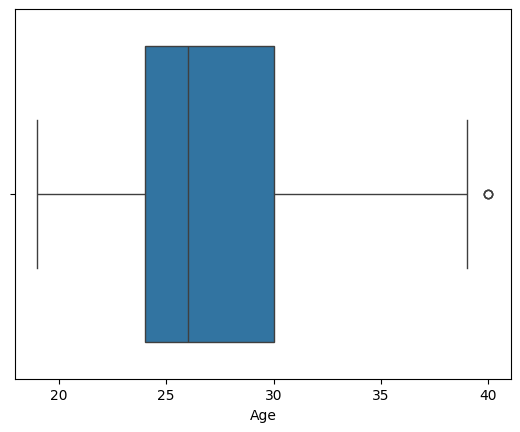

In [23]:
# python code for Boxplot
df = pd.read_csv('D:/Data Analytics/Data Analysis with Python/ABC.csv')

sns.boxplot(x='Age', data=df)

IQR means Interquartile Range (IQR)

Old Shape:  (458, 9)
New Shape:  (458, 9)


<Axes: xlabel='Number'>

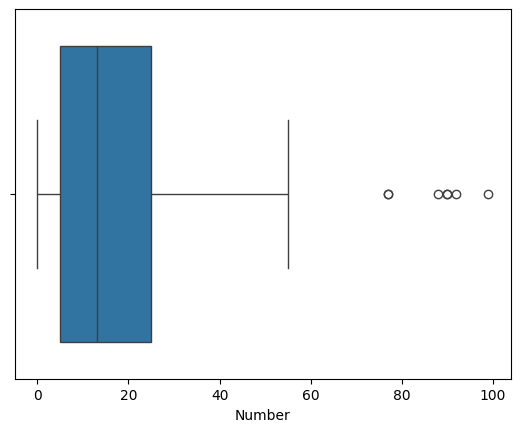

In [27]:
# removing outliers
import sklearn
from sklearn.datasets import fetch_california_housing
# These datasets provide similar data structures to the Boston housing dataset but without the ethical concerns.

import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('D:/Data Analytics/Data Analysis with Python/ABC.csv')

Q1 = np.percentile(df['Number'], 25,
                interpolation = 'midpoint')

Q3 = np.percentile(df['Number'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

upper = np.where(df['Number'] >= (Q3+1.5*IQR))
lower = np.where(df['Number'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)
sns.boxplot(x='Number', data=df)
